# Neural Networks with Derivatives

# Installing Dependencies

- networkx is for visualizing graphs
- numpy is for array manipulation
- pandas is for data manipulations in form of tables
- matplotlib is for plotting data and visualization

In [3]:
!pip install networkx
!pip install numpy
!pip install pandas
!pip install matplotlib

# Importing Libraries

In [4]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Derivative:
#### The derivative is a fundamental tool of calculus that **quantifies the sensitivity of change** of a **function's output with respect to its input**.

$$ \[
L = \lim_{{h \to 0}} \frac{{f(a + h) - f(a)}}{h}
\]
$$

### Let's take a Simple Parabolic Function:

$$ \[ f(x) = ax^2 + bx + c \] $$


In [5]:
# Assuming random 'a', 'b' and 'c' values
def f(x):
    return 3*x**2 + 2*x + 1

In [6]:
xs = np.arange(-5,5,0.25) # Creates a list of numbers from -5 to +5 with a step of 0.25
ys = f(xs)
for i in range(len(xs)):
    print(f"When x={xs[i]}; y={ys[i]}")

When x=-5.0; y=66.0
When x=-4.75; y=59.1875
When x=-4.5; y=52.75
When x=-4.25; y=46.6875
When x=-4.0; y=41.0
When x=-3.75; y=35.6875
When x=-3.5; y=30.75
When x=-3.25; y=26.1875
When x=-3.0; y=22.0
When x=-2.75; y=18.1875
When x=-2.5; y=14.75
When x=-2.25; y=11.6875
When x=-2.0; y=9.0
When x=-1.75; y=6.6875
When x=-1.5; y=4.75
When x=-1.25; y=3.1875
When x=-1.0; y=2.0
When x=-0.75; y=1.1875
When x=-0.5; y=0.75
When x=-0.25; y=0.6875
When x=0.0; y=1.0
When x=0.25; y=1.6875
When x=0.5; y=2.75
When x=0.75; y=4.1875
When x=1.0; y=6.0
When x=1.25; y=8.1875
When x=1.5; y=10.75
When x=1.75; y=13.6875
When x=2.0; y=17.0
When x=2.25; y=20.6875
When x=2.5; y=24.75
When x=2.75; y=29.1875
When x=3.0; y=34.0
When x=3.25; y=39.1875
When x=3.5; y=44.75
When x=3.75; y=50.6875
When x=4.0; y=57.0
When x=4.25; y=63.6875
When x=4.5; y=70.75
When x=4.75; y=78.1875


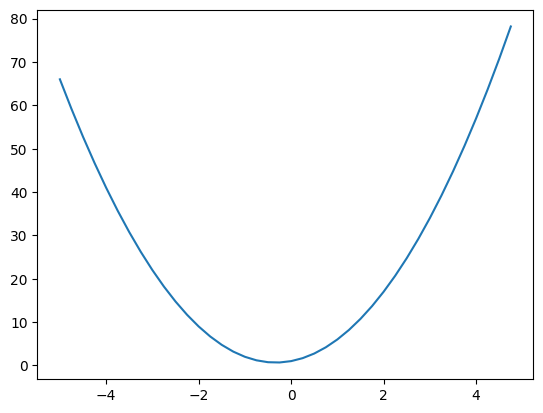

In [7]:
# Plotting the points on a graph gives us...
plt.plot(xs,ys)

According to the definition of Derivatives, we have to check what is the sensitivity of 'x' if we bump the value with 'h'

In [8]:
# Let's take a very small value of h and check the sensitivity in both positive and negetive
h = 0.1
x = 1.0
( f(x + h) / ( f(x) ) ) / h

11.383333333333333

In [9]:
# Let's take a very small value of h and check the sensitivity in both positive and negetive
h = -0.1
x = 1.0
( f(x + h) / ( f(x) ) ) / h

-8.716666666666667

Let's try a different scenario where we use mathematical expressions to understand derivatives

In [10]:
# Let's say we have an expression with values

j = 5.0
k = -0.1
l = 10.0

h = 0.001

expressionBeforeBumping = j * k + l
l += h # Here the value of l is bumped up in the positive direction
expressionAfterBumping = j * k + l
slope = (expressionAfterBumping - expressionBeforeBumping)/h

print(f"Expression before bumping: {expressionBeforeBumping};", f"Expression after bumping: {expressionAfterBumping};", f"Slope {slope}")

Expression before bumping: 9.5; Expression after bumping: 9.501; Slope 0.9999999999994458


# Why are Derivatives Important?

Eventually, when we arrive at the important parts like gradient descent algorithm, we will be requiring derivatives.

**What is "Gradient" you ask?**

Imagine a car being dropped on a parabolic slope. You want the car to 'eventually' stop at a particular point. So you start applying brakes (basically a force in the opposite direction) of the movement.

This force in the opposite direction is known as a gradient.

**What is the relationship between a 'derivative' and a 'gradient'?**

A 'Gradient' is a 'Derivative' with known direction.
In Derivatives we check the sensitivity in all directions for a value.
But in Gradients we know the direction we want to push, we just have to tinker with the value.

# Mathematical Example

#### Let's take a more complicated mathematical expression and try to evaluate it with gradients:

Let's assume random values as 'r'

1. A = r
2. B = r
3. C = A * B
4. D = r
5. E = C + D
6. F = r
7. L = E * F

Where **L** is the result of this expression

In [143]:
# Let's construct a Value class to store all the expressions for simpler calculations
class Value:
    # Constructor
    def __init__(self , data,_children=(), label='', _op=''):
        self.data = data
        self.label = label
        # Used for Graph Construction
        self._prev = set(_children)
        self._op = _op if _op else label
    # For Printing Without Print Statements | Representation
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return Value(self.data + other.data, (self, other), '+')
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return Value(self.data * other.data, (self, other), '*')
    # other + self
    def __radd__(self, other):
        return self + other
    # other * self
    def __rmul__(self, other):
        return self * other

In [144]:
a = Value(3, label='a')
b = Value(-2, label='b')
c = a * b
d = Value(5, label='d')
e = c + d
f = Value(-10, label='f')
L = e * f

c.label = 'c'
e.label = 'e'
L.label = 'L'

Let's visualize our expression in form of expression graphs now

In [147]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_networkx(root, rankdir='LR'):
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    
    G = nx.DiGraph()
    
    for n in nodes:
        label = "{label} \n d={data:.4f}".format(label=n.label, data=n.data)
        G.add_node(str(id(n)), label=label)
        if n._op:
            G.add_node(str(id(n)) + n._op, label=n._op)
            G.add_edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        G.add_edge(str(id(n1)), str(id(n2)) + n2._op)
    
    pos = None
    if rankdir == 'LR':
        pos = nx.spring_layout(G, seed=4)
    
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos=pos, with_labels=True, labels=labels, font_size=6, font_weight='bold')
    plt.show()

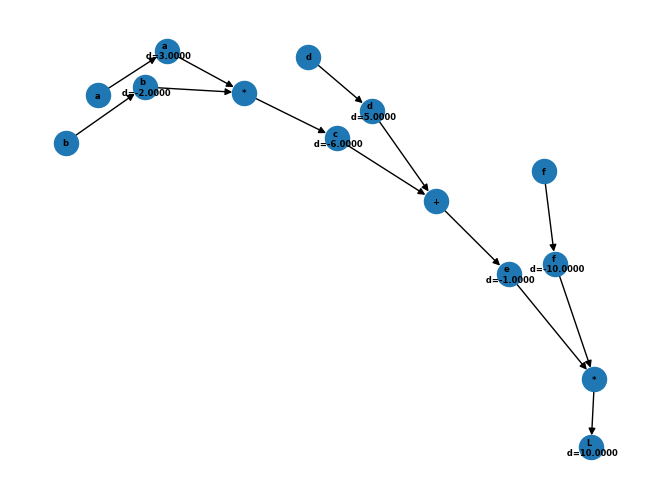

In [148]:
draw_networkx(L)